# ANOGAN - Anomaly Detection with Generative Adversarial Networks 
### Anomaly Detection with Generative Adversarial Networks
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.anogan

### Arguments that work with ANOGAN algorithm:
1. activation_hidden
2. dropout_rate
3. latent_dim_G
4. G_layers
5. verbose
6. D_layers
7. index_D_layer_for_recon_error
8. epochs
9. preprocessing
10. learning_rate
11. learning_rate_query
12. epochs_query
13. batch_size
14. output_activation
15. contamination

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [3]:
imgs = O.DataHelper.get2D(N = 100, config_num=6, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took    41.584046 seconds
image downsampling       ...took     0.779525 seconds
image downsampling       ...took     1.253872 seconds
image downsampling       ...took     1.728314 seconds
image downsampling       ...took     2.783861 seconds
image downsampling       ...took     3.258741 seconds
image downsampling       ...took     3.743063 seconds
image downsampling       ...took     4.217945 seconds
image downsampling       ...took     4.693588 seconds
image downsampling       ...took     5.748375 seconds
image downsampling       ...took     6.804218 seconds
image downsampling       ...took     8.223783 seconds
image downsampling       ...took     8.698260 seconds
image downsampling       ...took     9.173712 seconds
image downsampling       ...took     9.647980 seconds
image downsampling       ...took    10.121884 seconds
image downsampling       ...took    10.596398 seconds
image downsampling       ...took    11.071927 seconds
image downsampling       ...

2022-08-27 22:06:45.108383: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-27 22:06:46.584256: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-08-27 22:06:46.834366: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-27 22:06:46.834420: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-08-27 22:06:46.837585: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-08-27 22:06:46.837626: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

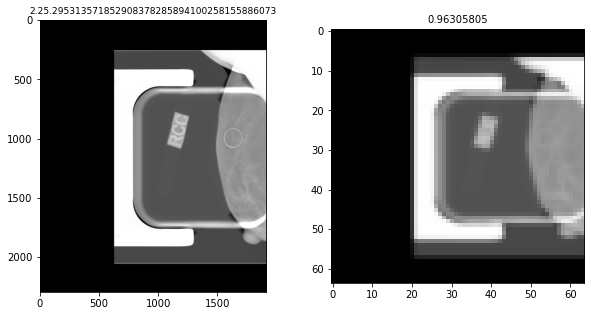

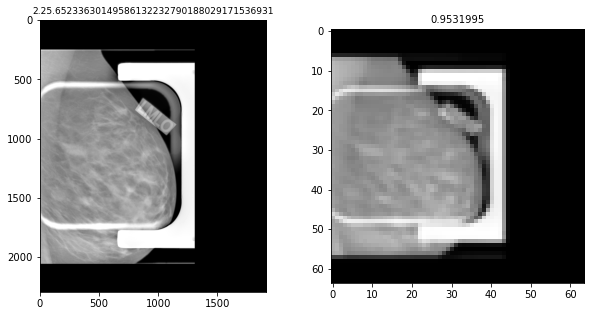

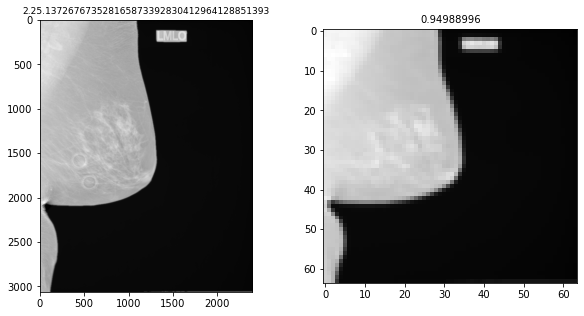

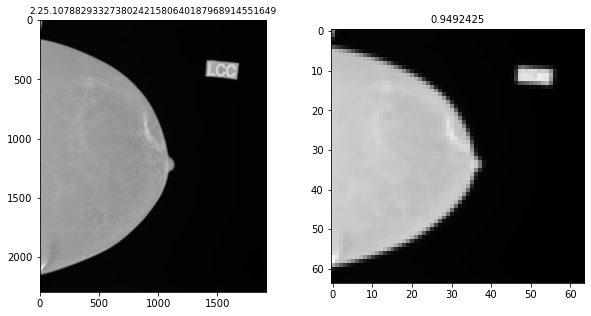

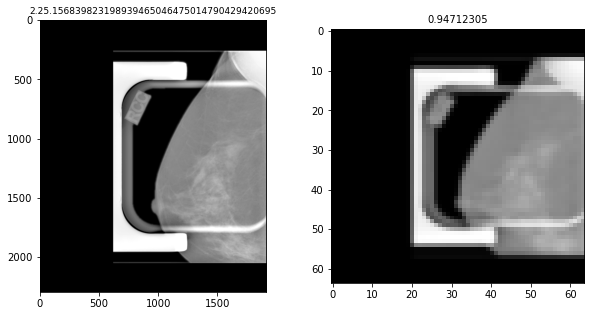

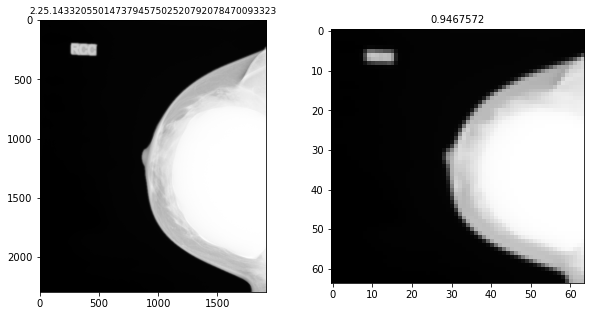

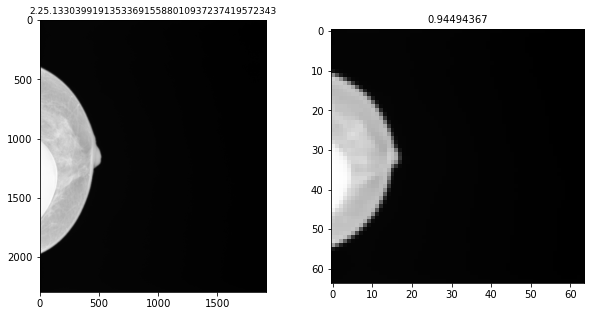

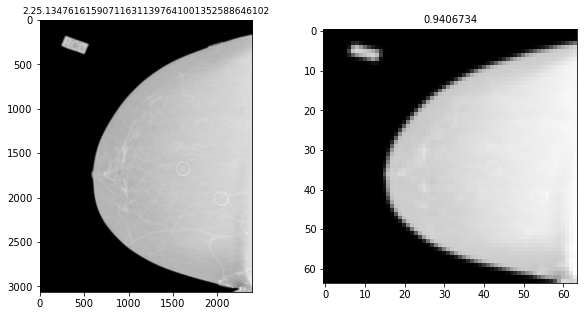

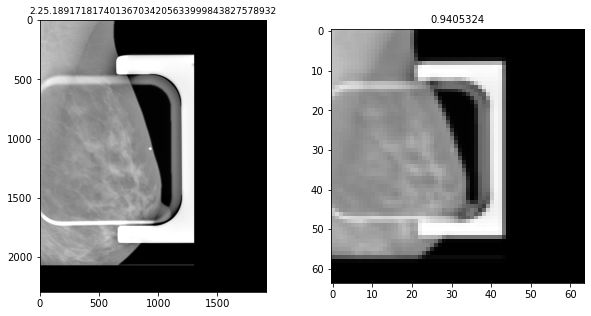

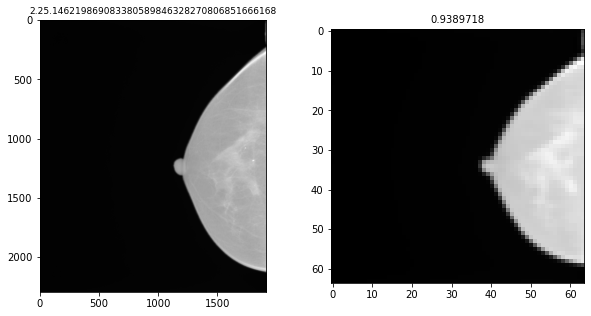

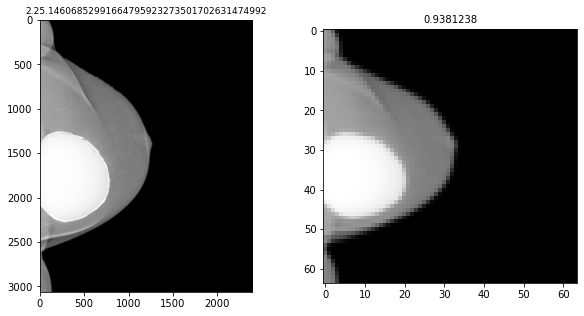

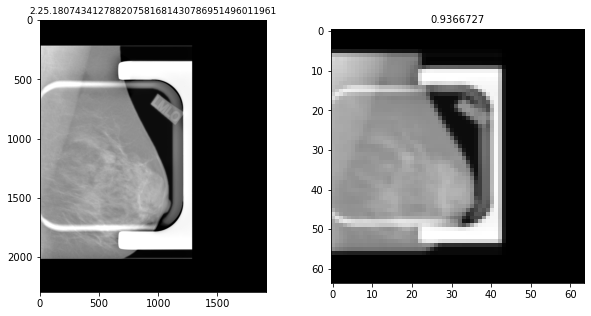

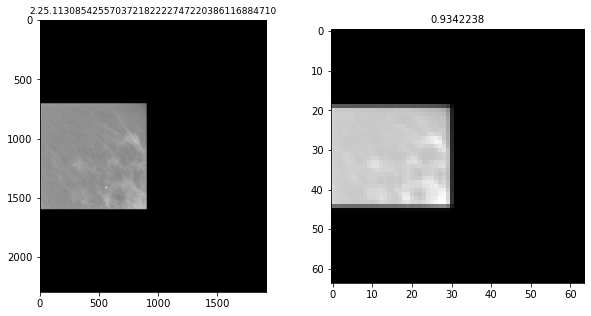

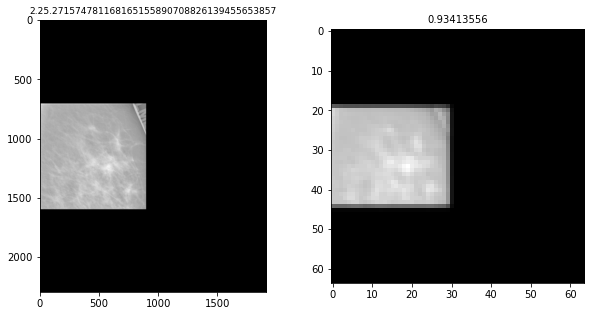

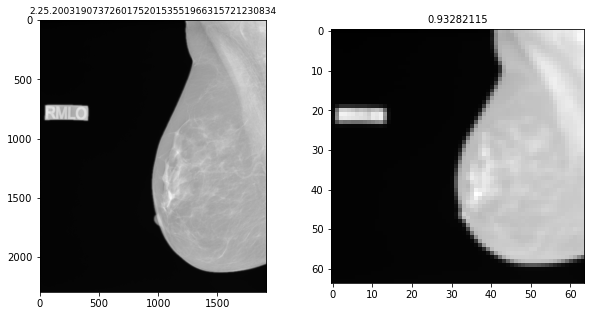

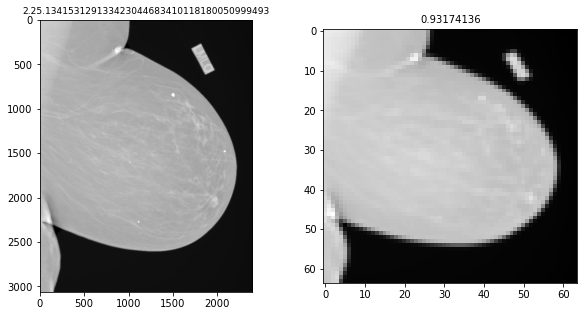

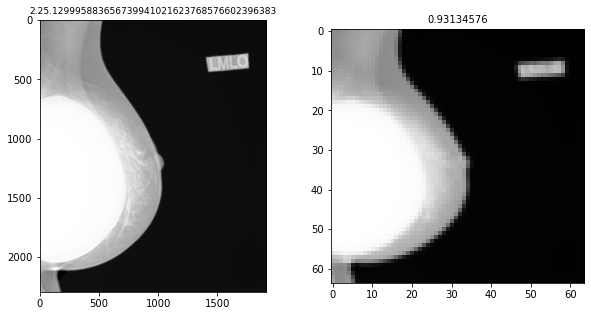

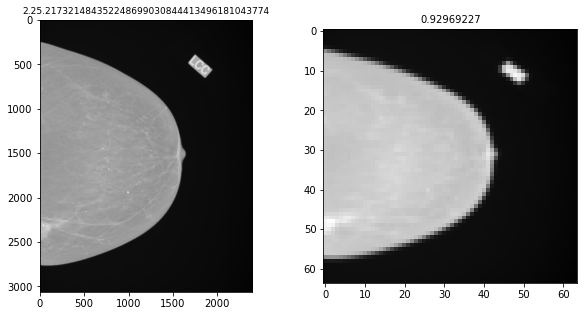

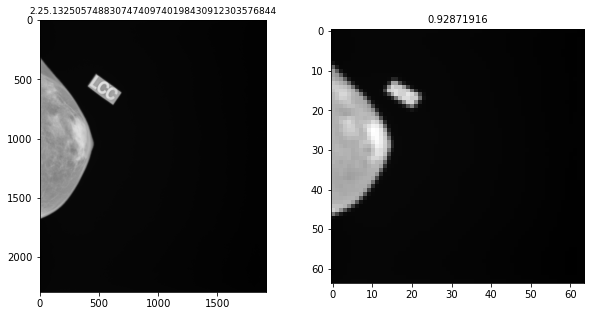

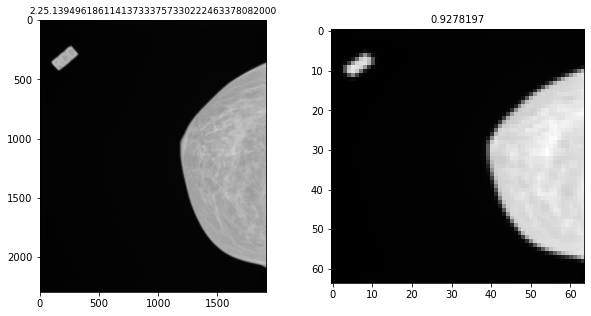

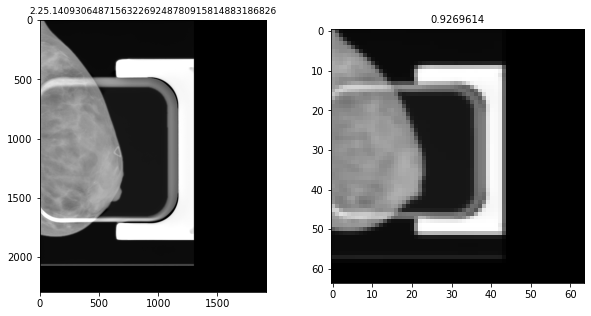

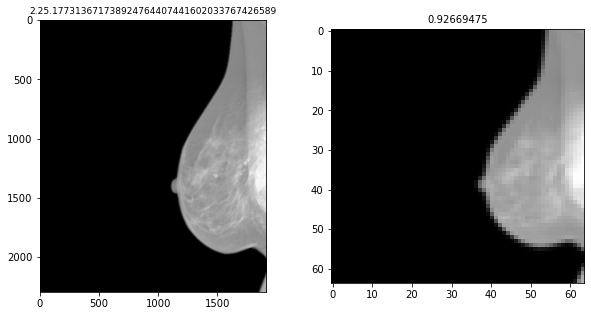

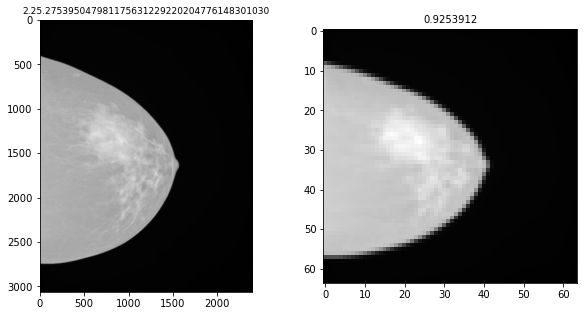

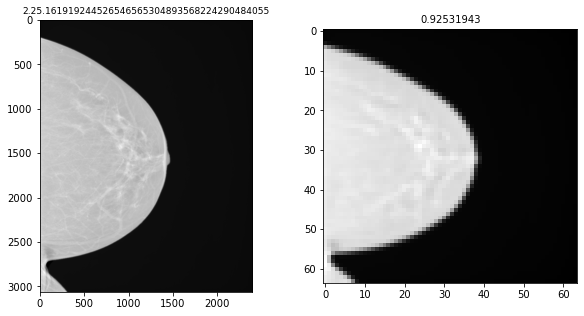

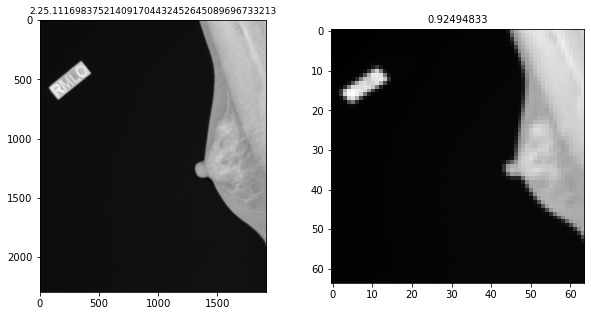

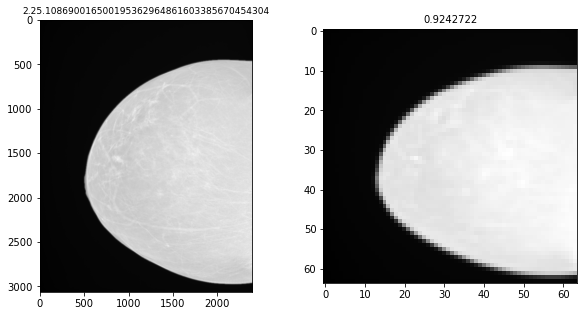

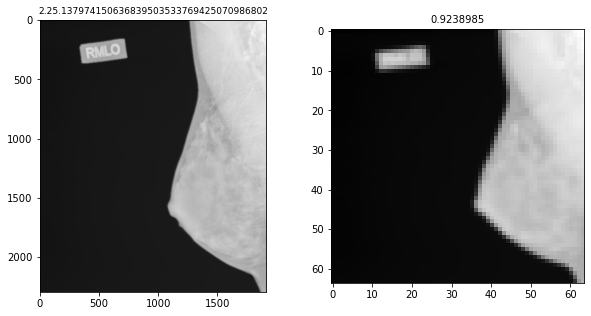

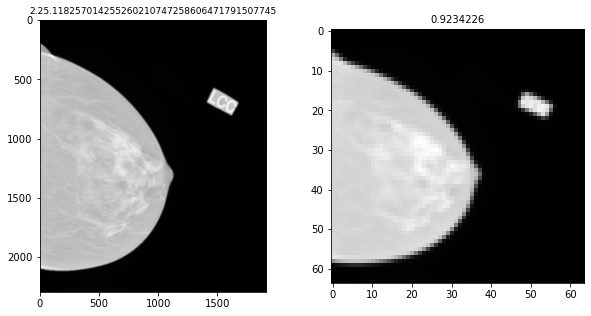

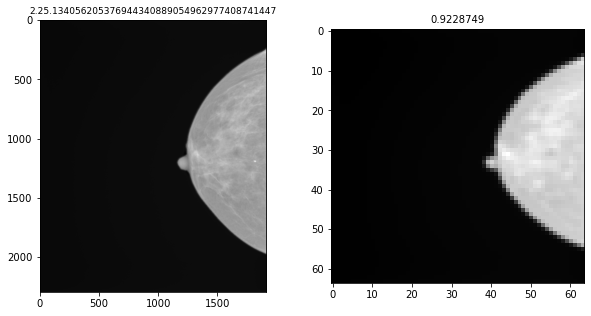

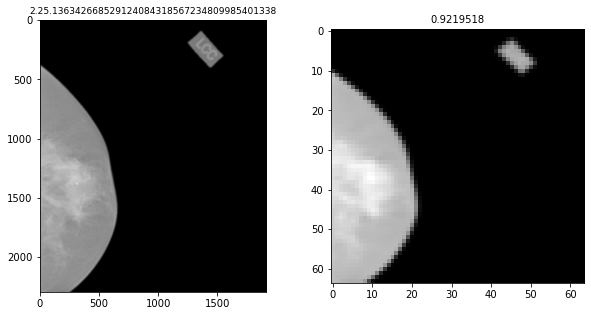

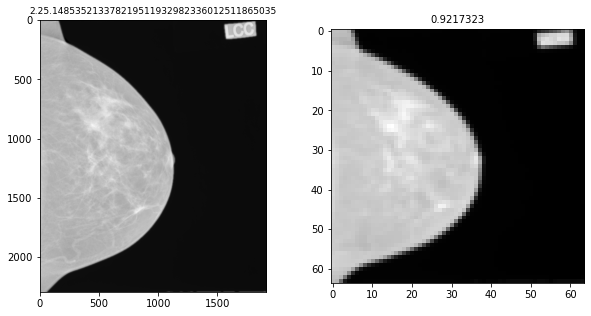

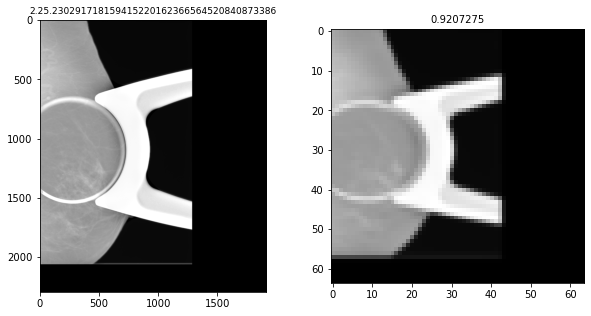

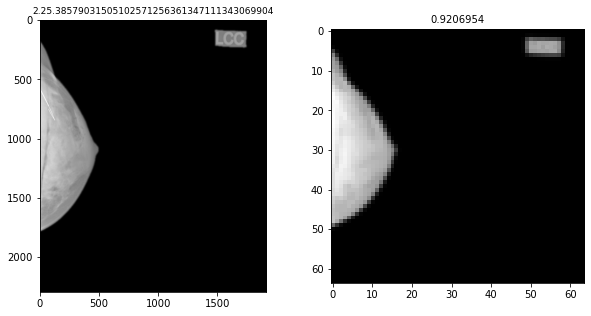

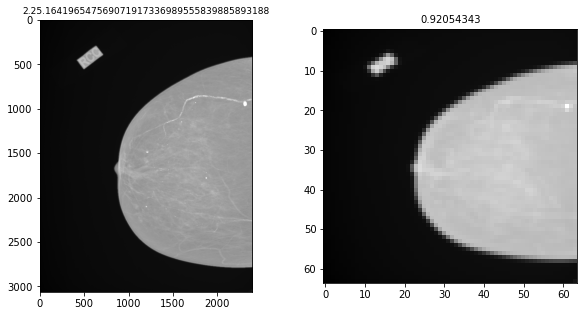

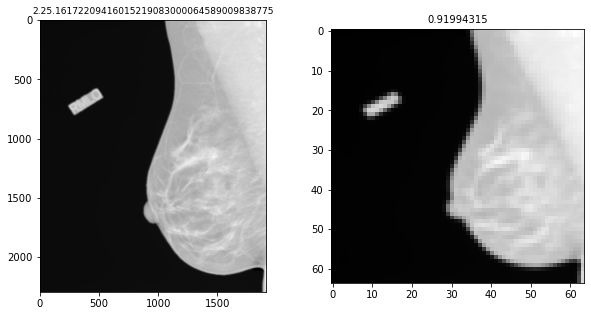

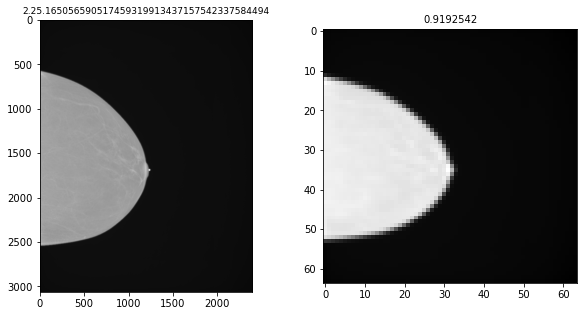

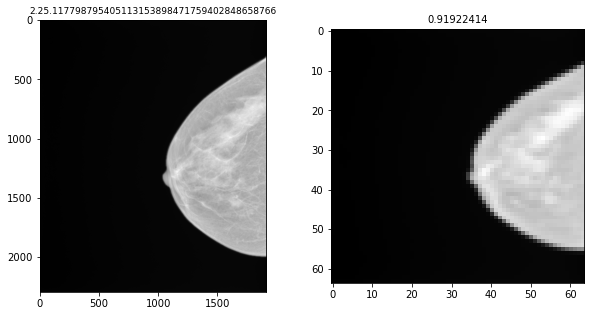

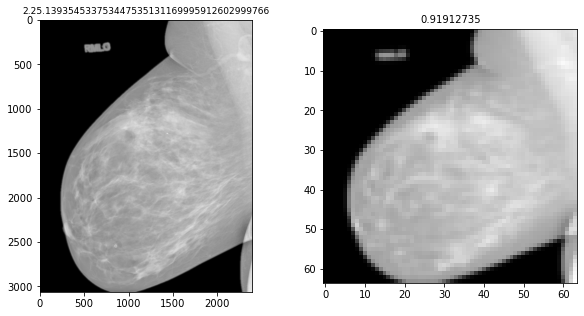

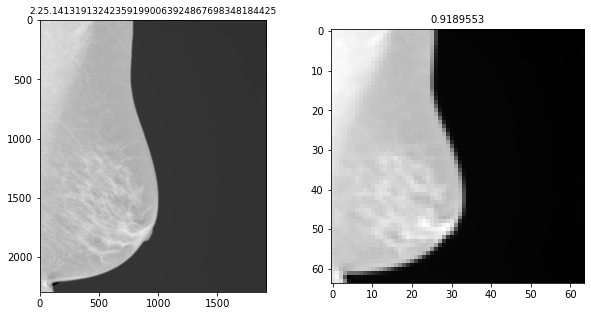

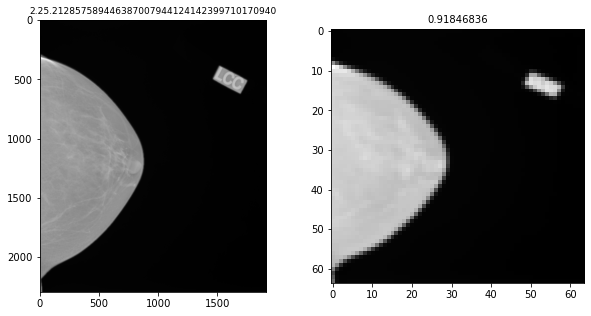

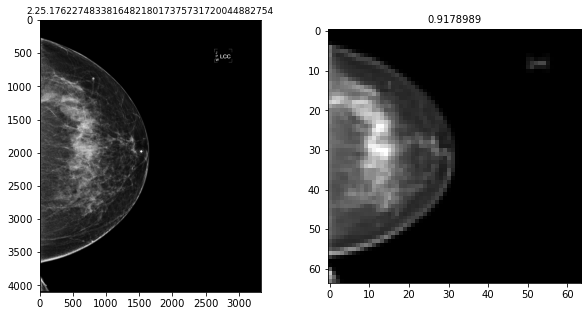

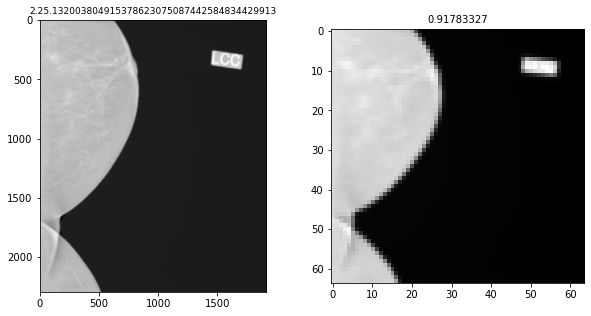

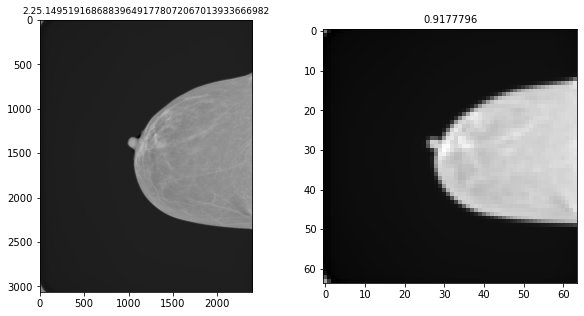

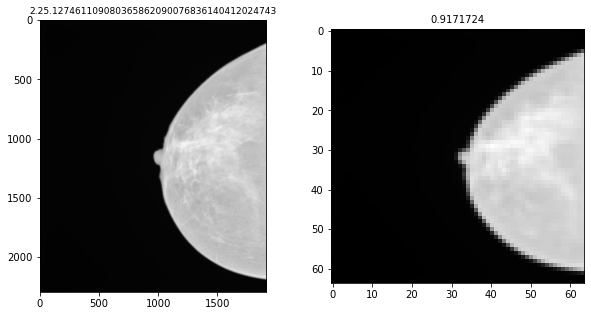

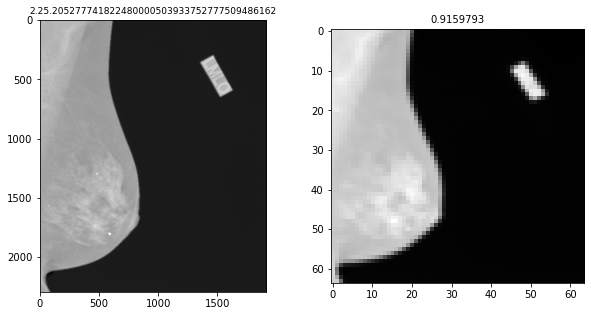

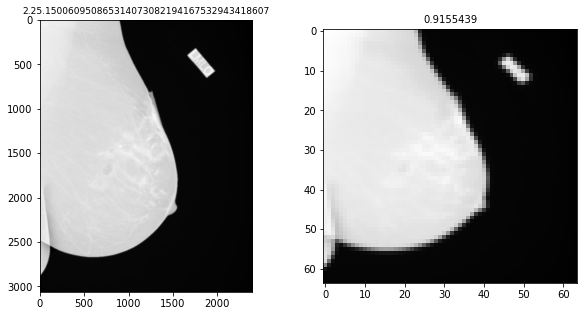

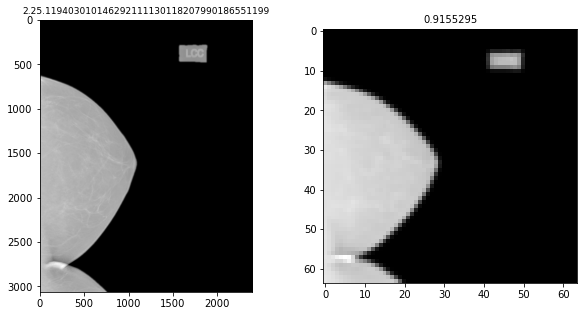

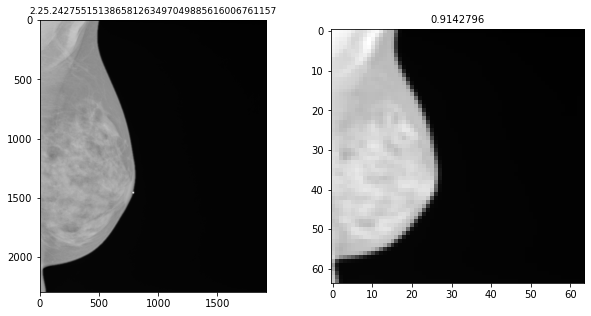

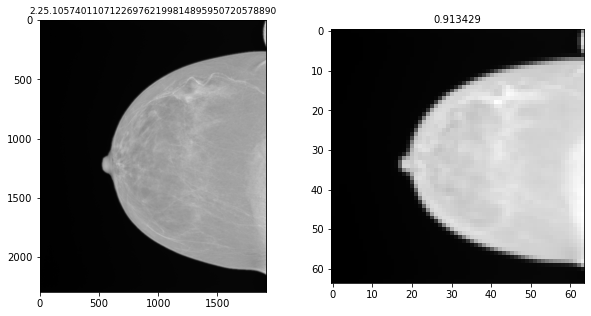

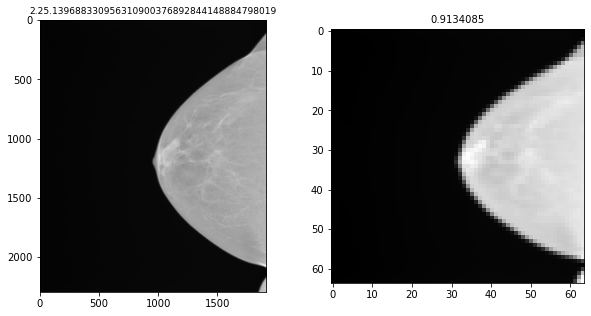

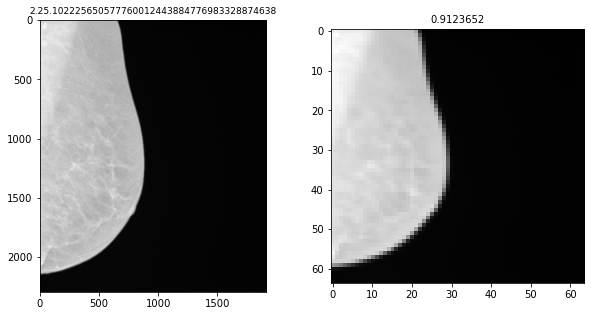

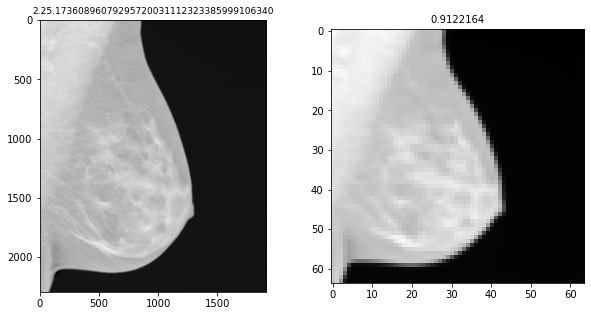

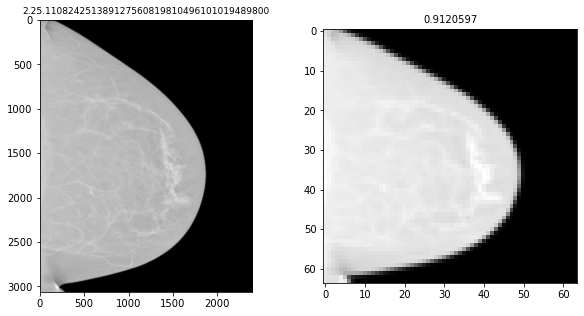

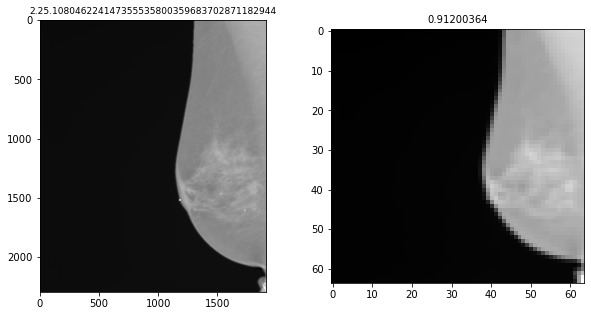

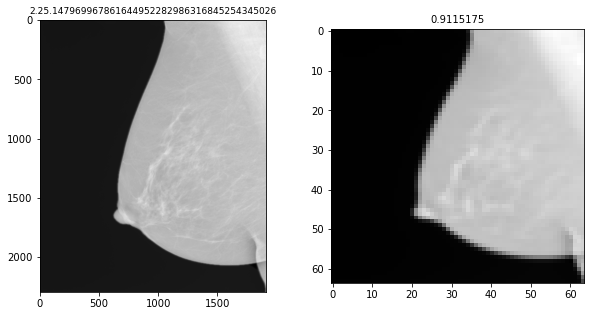

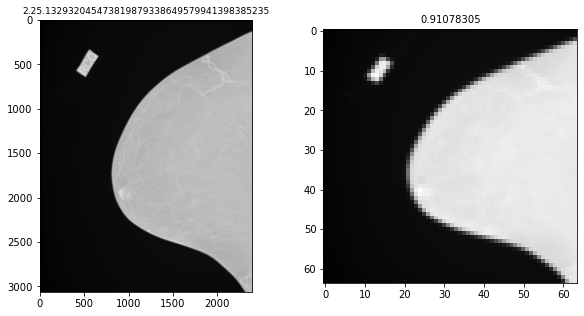

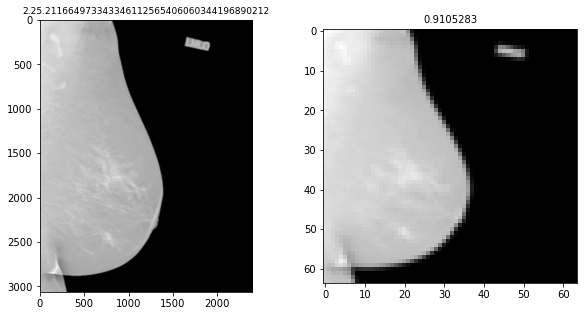

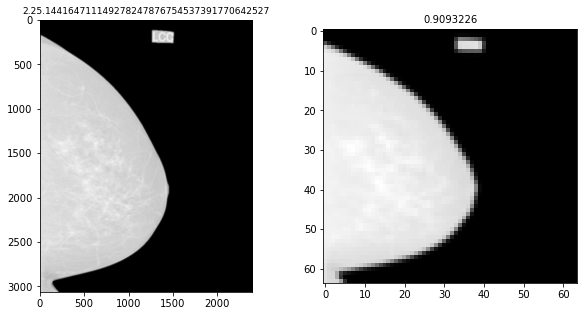

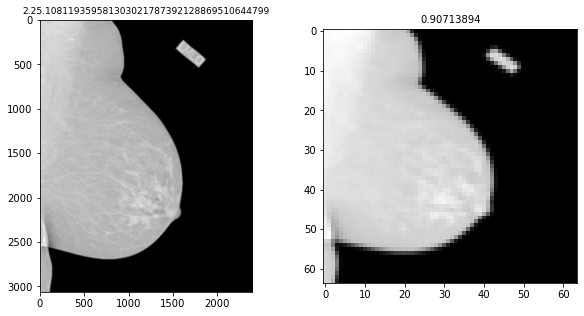

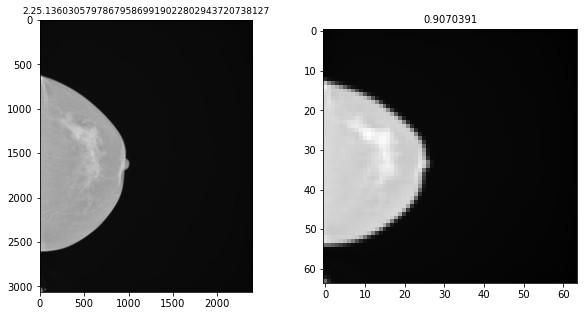

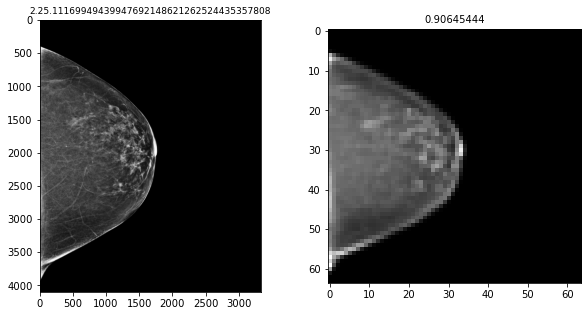

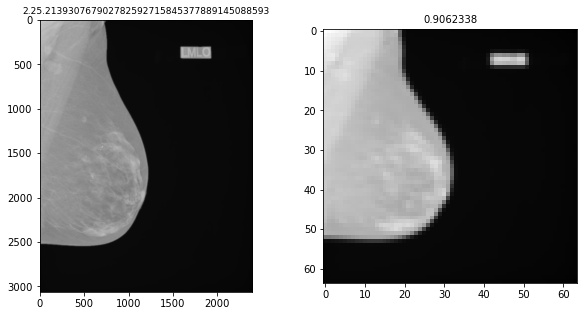

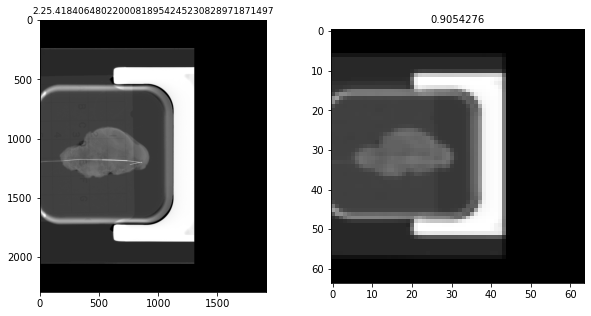

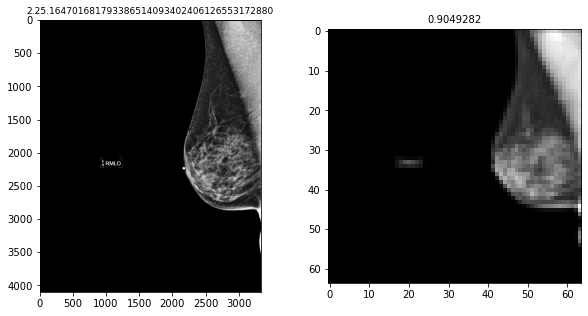

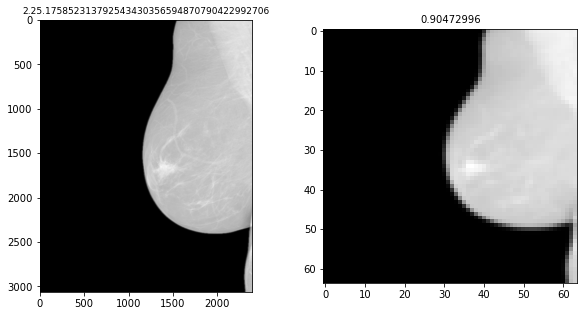

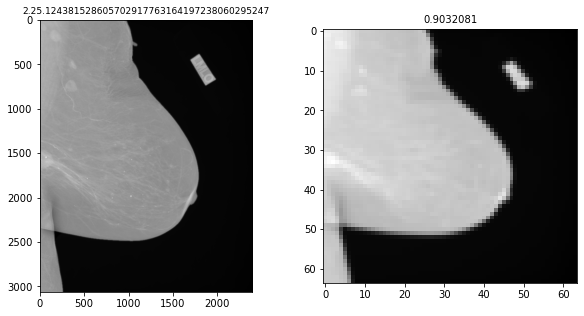

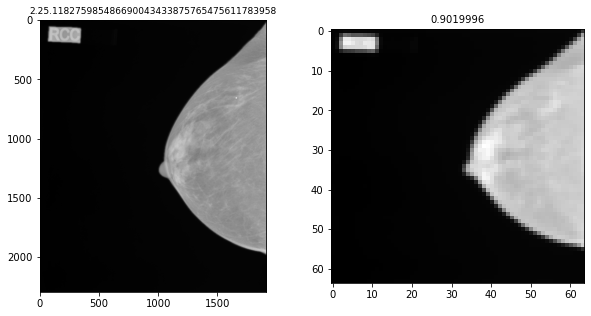

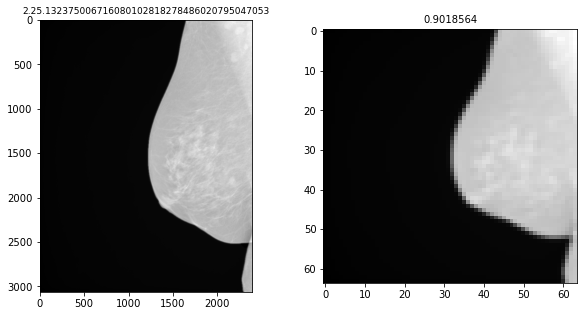

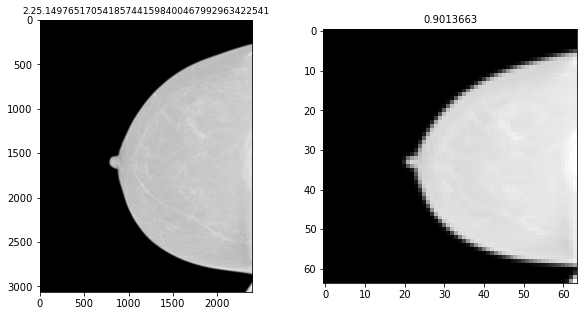

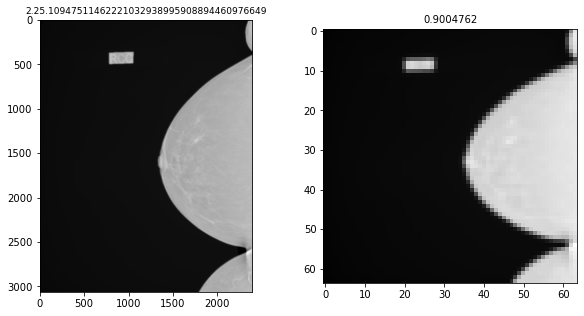

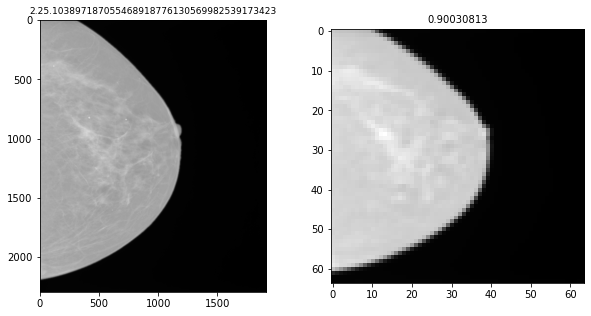

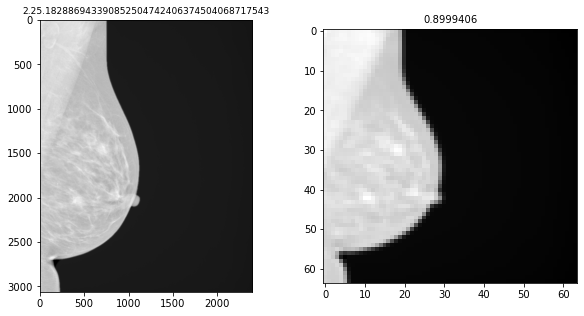

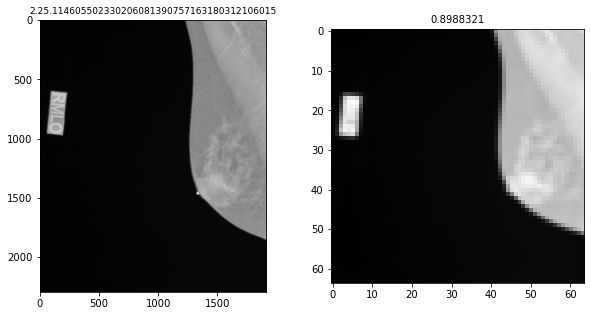

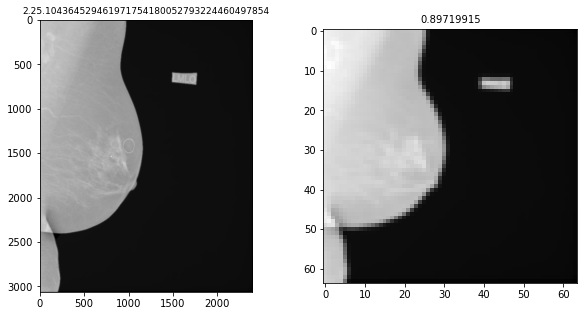

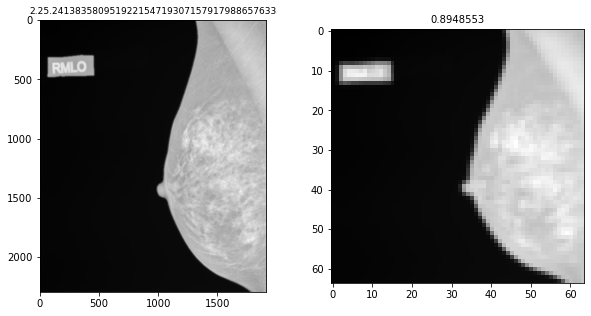

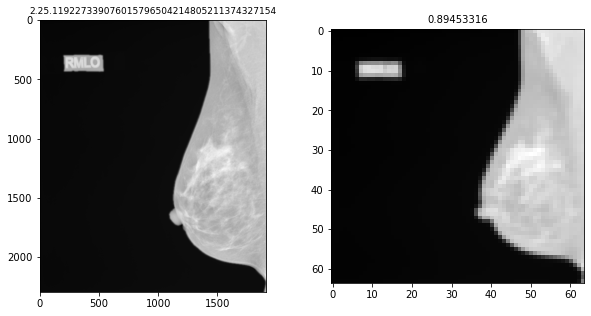

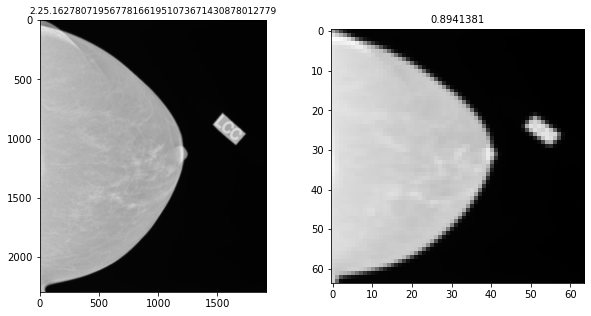

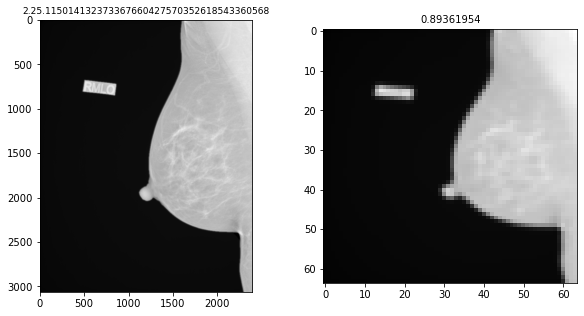

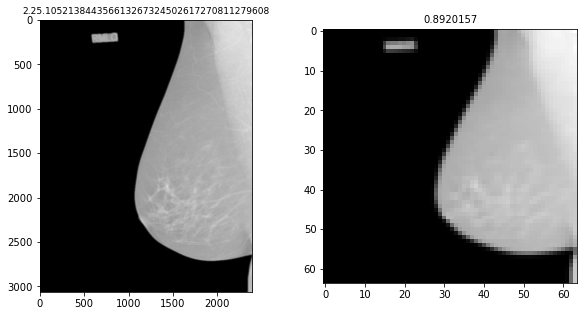

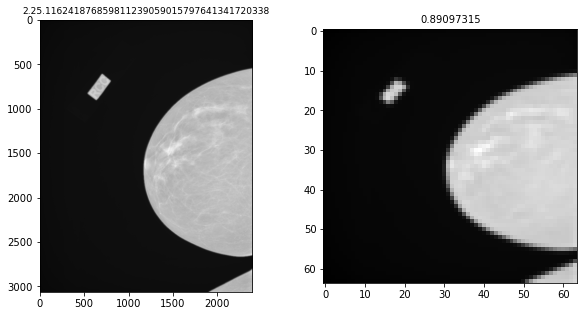

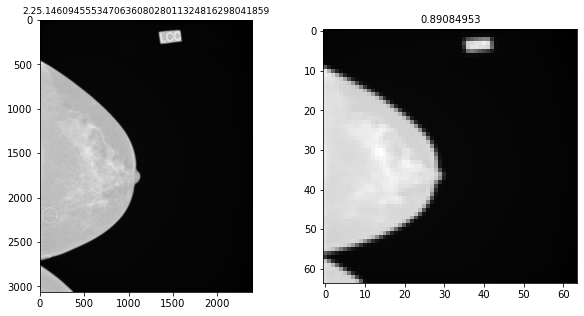

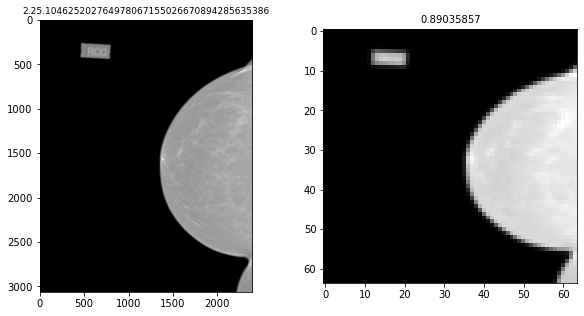

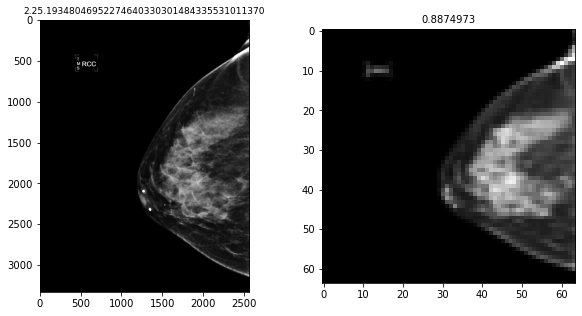

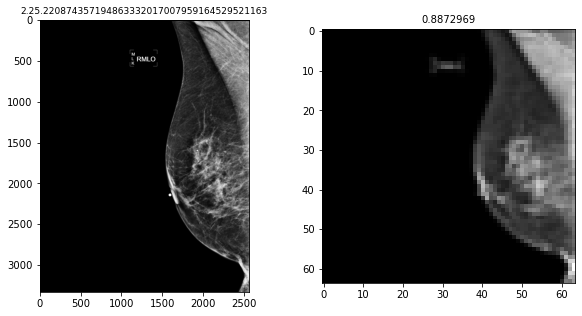

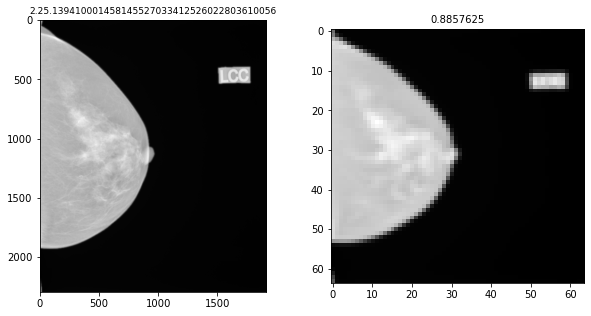

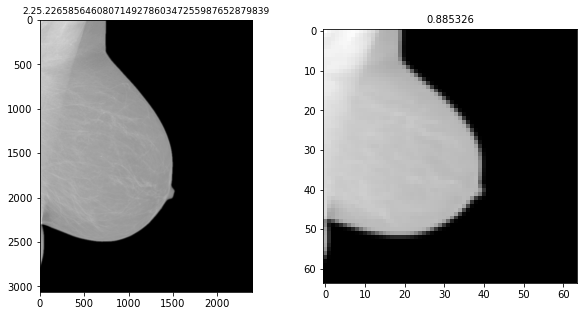

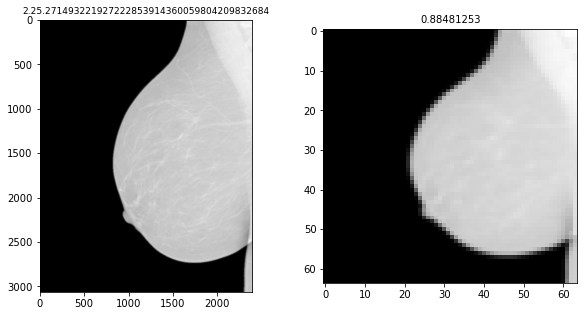

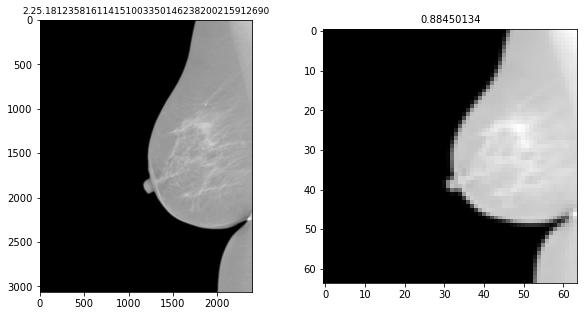

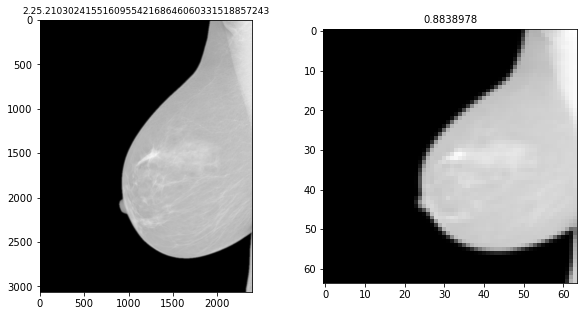

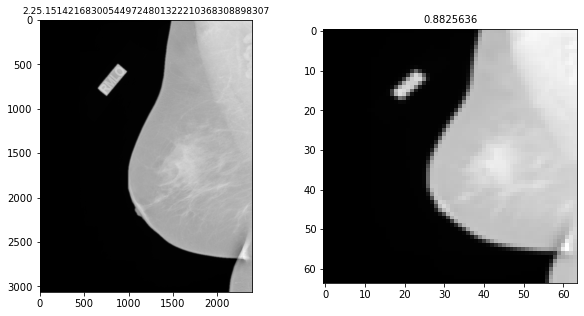

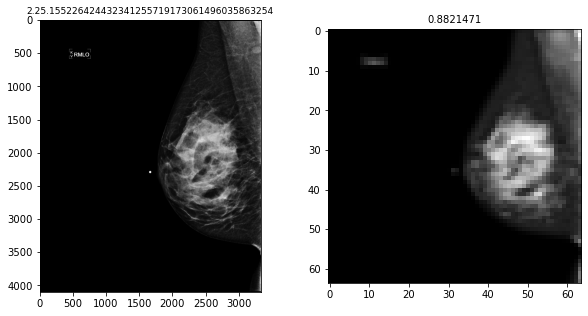

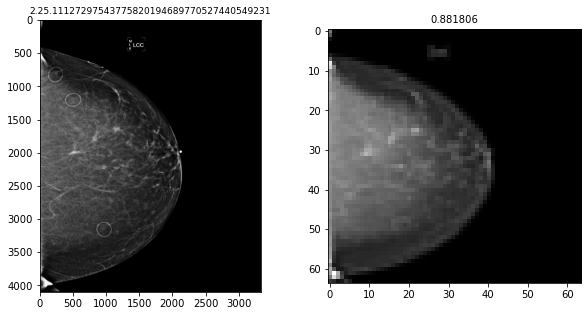

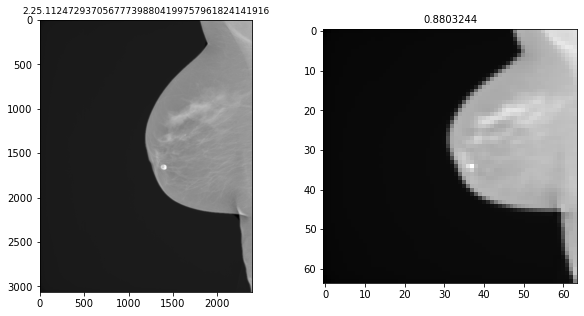

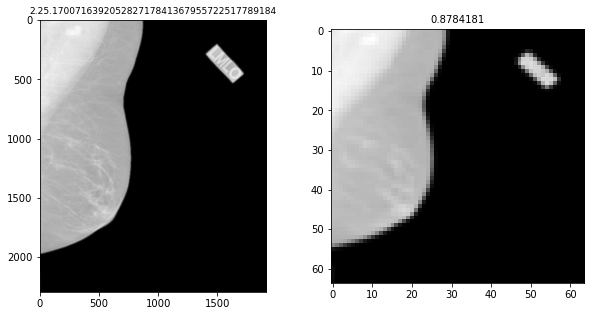

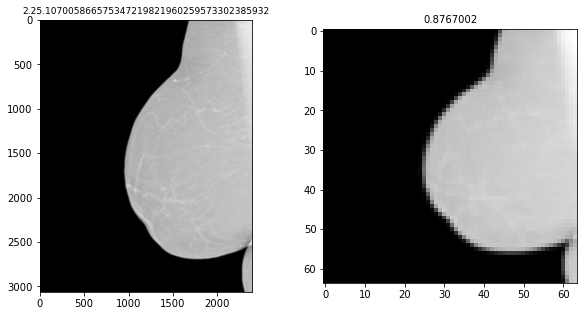

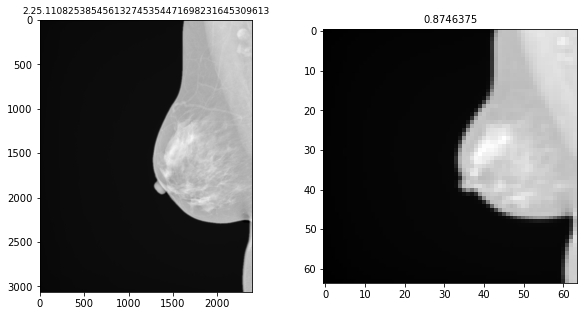

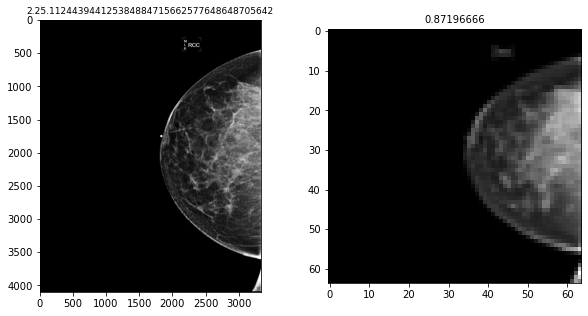

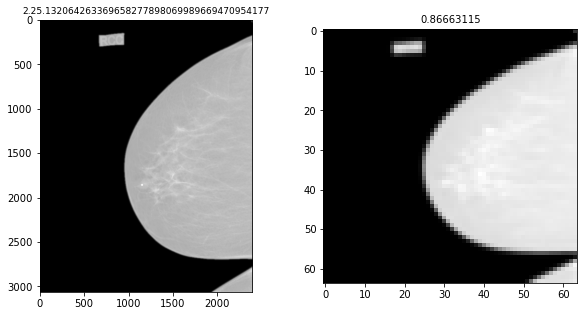

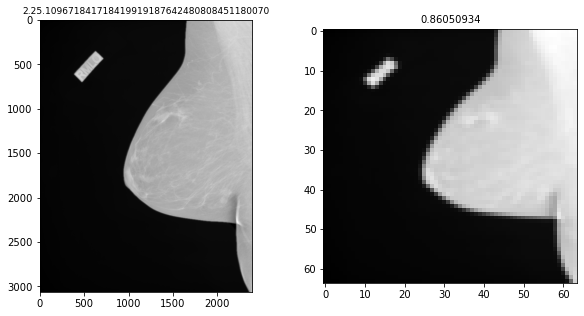

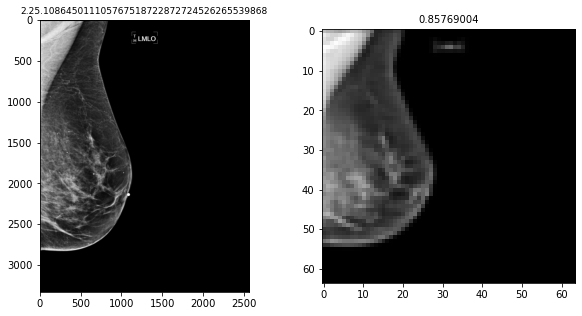

In [4]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='AnoGAN')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])

In [5]:
train_labelsX

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

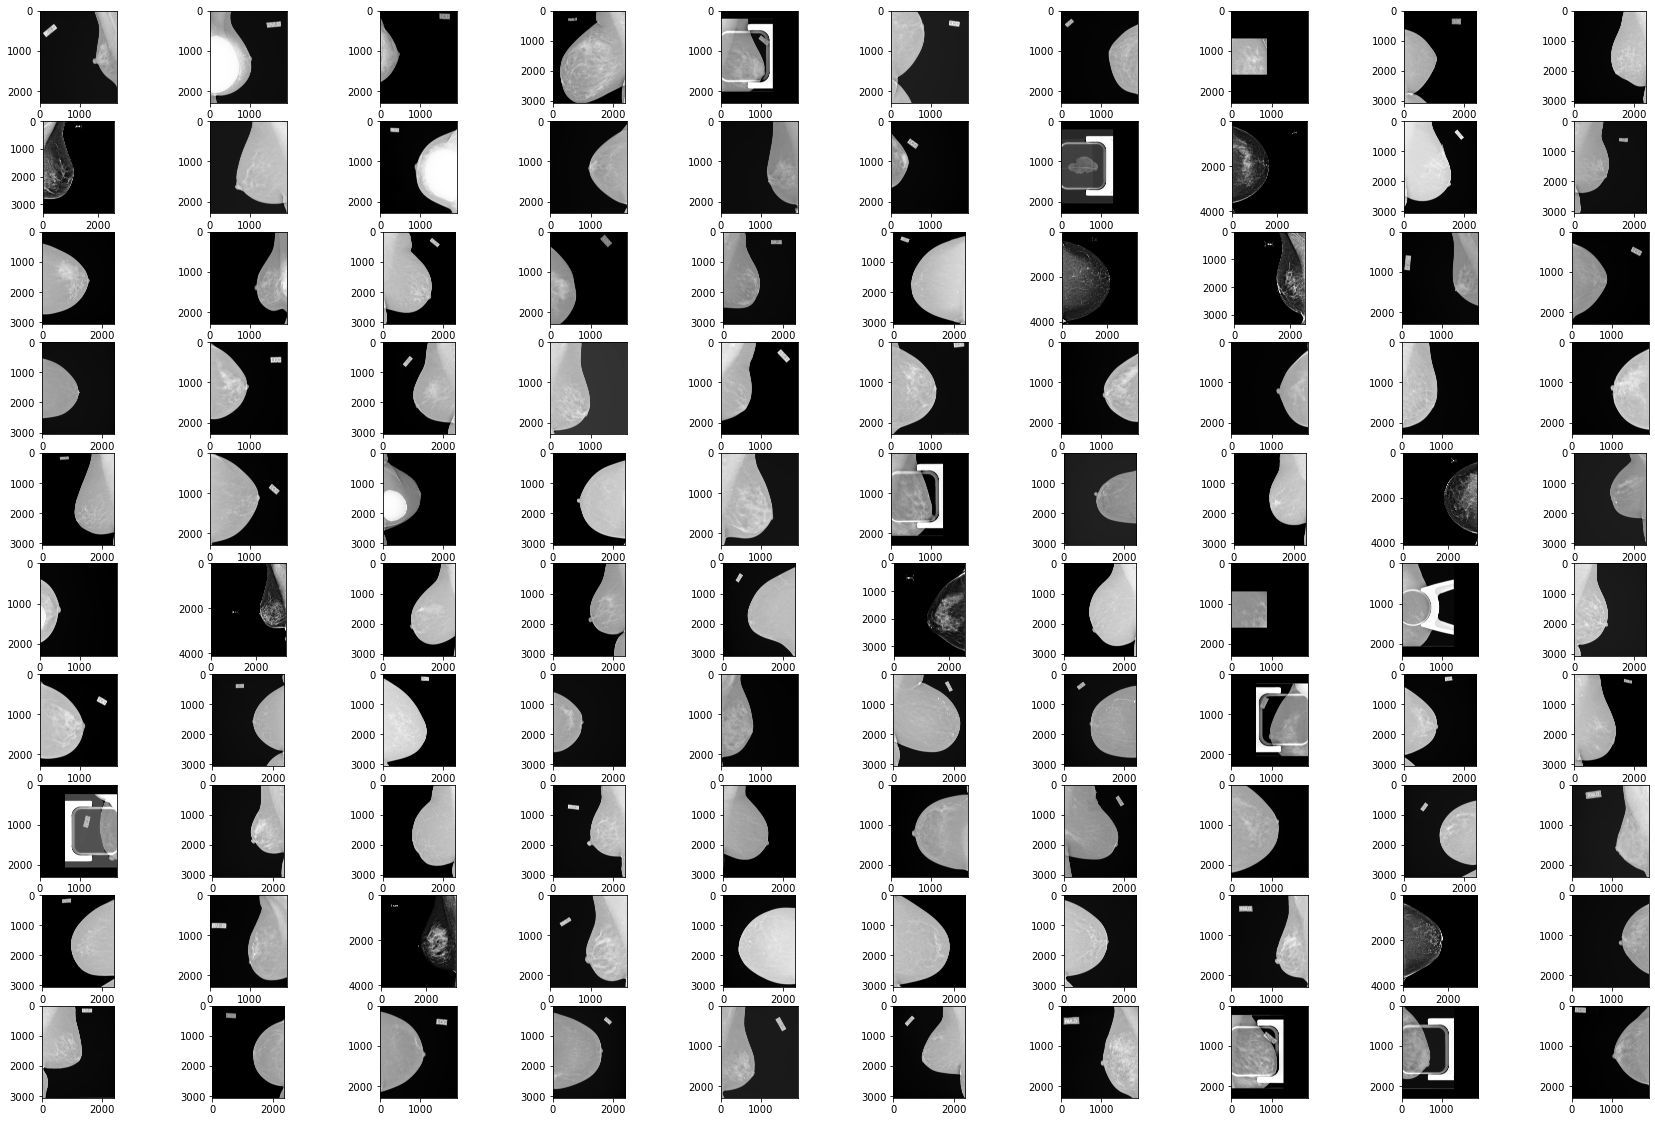

In [6]:
O.DataHelper.view_grid(imgs)